<a href="https://colab.research.google.com/github/sejallotliker/MLnow_2.0/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning

Linear regression

Author: `Sejal Lotliker`

Date: `11-06-2021`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [3]:
path='/content/drive/MyDrive/Machine learning course by Girlscript/ML_EDA_Students performance in exam/StudentsPerformance.csv'
my_data=my_data=pd.read_csv(path)

In [5]:
my_data.head()

,gender,groups,parentsEducation,lunch,test_preparation_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
unimy_data=my_data[['math score','reading score']]
unimy_data.head()

,math score,reading score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78


In [7]:
unimy_data.to_csv('univariate_my_data.csv')

In [8]:
ls

drive/  sample_data/  univariate_my_data.csv


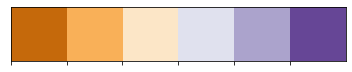

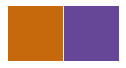

In [9]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purpole to orange colors
pal=sns.color_palette('PuOr',6) #To print 6 shades from purple to orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697'] #orange purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [10]:
unimy_data.columns

Index(['math score', 'reading score'], dtype='object')

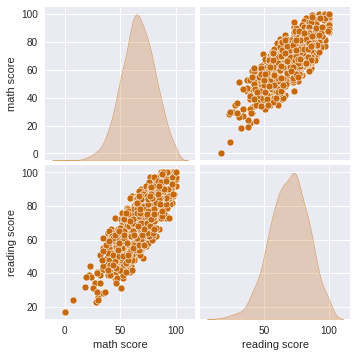

In [11]:
#pairplot for all the values
sns.pairplot(unimy_data,
             x_vars = ['math score', 'reading score'],
             y_vars = ['math score', 'reading score'],
             diag_kind='kde' 
             )

#Data splitting

Data splitting is done for univariate my_data

In [12]:
# 80-20 train-test percent split
trainDataset= unimy_data.sample(frac=0.8, random_state=0)
testDataset= unimy_data.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     math score  reading score
993          62             72
859          87             73
298          40             46
553          77             62
672          69             78
    math score  reading score
9           38             60
11          40             52
19          54             58
23          69             73
28          70             70


In [13]:
print(trainDataset.shape)
print(testDataset.shape)

(800, 2)
(200, 2)


In [14]:
# to copy the trainDataset dataframe for getting the features
trainFeatures= trainDataset.copy()
testFeatures= testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     math score  reading score
993          62             72
859          87             73
298          40             46
553          77             62
672          69             78
    math score  reading score
9           38             60
11          40             52
19          54             58
23          69             73
28          70             70


In [19]:
#To remove the math score column and saving it into the labels variables

trainLabels = trainFeatures.pop('math score')
testLabels = testFeatures.pop('math score')

print(trainLabels.head())
print(testLabels.head())

993    62
859    87
298    40
553    77
672    69
Name: math score, dtype: int64
9     38
11    40
19    54
23    69
28    70
Name: math score, dtype: int64


In [21]:
print(trainFeatures.head())
print(testFeatures.head())

     reading score
993             72
859             73
298             46
553             62
672             78
    reading score
9              60
11             52
19             58
23             73
28             70


In [22]:
print(testFeatures.shape)
print(trainFeatures.shape)

(200, 1)
(800, 1)


In [15]:
# For univariate -- Num features = 1
# for multivariate -- Num Features> 1 = 11

model = tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

In [16]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001) #learning rate specified as 0.001
    #optimizer = 'adam', # takes the default learning rate
    ,metrics = ['mae','mse']  
)

In [20]:
numEpochs = 300
history = model.fit(x=trainFeatures, y=trainLabels, validation_data=(testFeatures, testLabels), epochs= numEpochs)

Epoch 1/300
25/25 [==============================] - 1s 9ms/step - loss: 11.3634 - mae: 11.3634 - mse: 183.9161 - val_loss: 10.5168 - val_mae: 10.5168 - val_mse: 157.9699
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 10.1049 - mae: 10.1049 - mse: 151.3403 - val_loss: 9.4286 - val_mae: 9.4286 - val_mse: 130.8339
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 9.0876 - mae: 9.0876 - mse: 126.3319 - val_loss: 8.5673 - val_mae: 8.5673 - val_mse: 111.0556
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 8.4223 - mae: 8.4223 - mse: 109.1781 - val_loss: 7.9574 - val_mae: 7.9574 - val_mse: 97.2387
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 7.9395 - mae: 7.9395 - mse: 97.0845 - val_loss: 7.5478 - val_mae: 7.5478 - val_mse: 88.6679
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 7.6498 - mae: 7.6498 - mse: 89.6800 - val_loss: 7.2822 - val_mae: 7.2822 - val_mse: 83.20

In [23]:
print(history)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


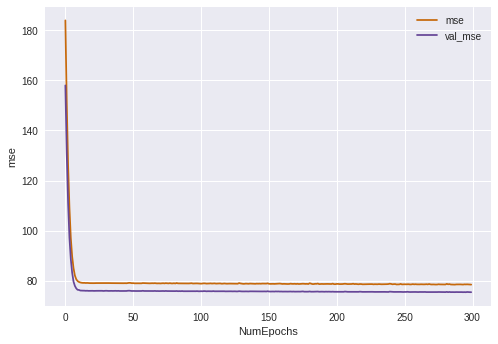

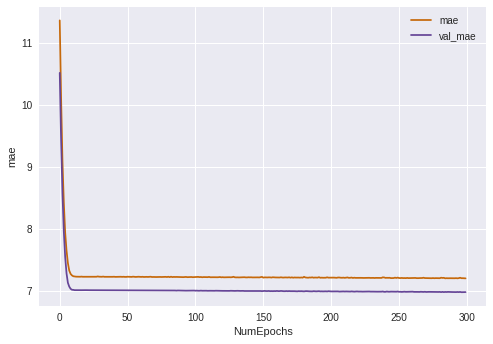

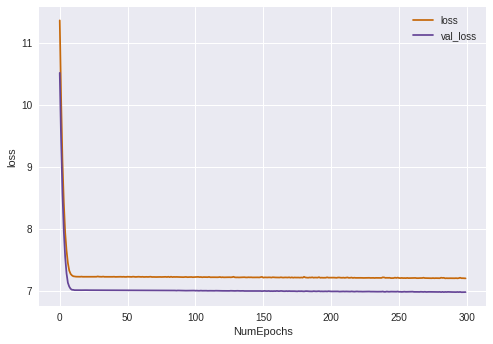

In [25]:
#tempString = 'mse'
def curvePlots(tempString):

 plt.plot(history.history[tempString])
 plt.plot(history.history[f'val_{tempString}'])
 plt.xlabel('NumEpochs')
 plt.ylabel(tempString)
 plt.legend([tempString ,f'val_{tempString}'])
 plt.show()

curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [26]:
model.predict([1])

array([[2.0799718]], dtype=float32)

In [27]:
print(f'Prediction for input value 1:{model.predict([1])}')

#for a list of values
tempListforPreds=[1,2,3,4,5,6]
print(f'''

input List ={tempListforPreds}

List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions(flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1:[[2.0799718]]


input List =[1, 2, 3, 4, 5, 6]

List of Predictions:
[[2.0799718]
 [3.0122013]
 [3.9444304]
 [4.87666  ]
 [5.8088894]
 [6.7411184]]

List of Predictions(flattened out):
[2.0799718 3.0122013 3.9444304 4.87666   5.8088894 6.7411184]



In [28]:
print(testFeatures)

     reading score
9               60
11              52
19              58
23              73
28              70
..             ...
962            100
966             68
976             62
980             24
983             87

[200 rows x 1 columns]


In [30]:
model.predict([testFeatures]).flatten()

array([57.08151 , 49.623672, 55.21705 , 69.20049 , 66.4038  , 68.26826 ,
       76.658325, 69.20049 , 55.21705 , 61.742653, 67.33603 , 73.86163 ,
       52.42036 , 56.149277, 59.878197, 48.691444, 46.826984, 44.962524,
       37.50469 , 78.52278 , 67.33603 , 32.84354 , 81.31947 , 76.658325,
       63.607113, 63.607113, 72.929405, 65.47157 , 54.28482 , 77.59055 ,
       79.45501 , 35.640232, 58.013737, 41.23361 , 64.53934 , 71.06495 ,
       63.607113, 66.4038  , 71.06495 , 48.691444, 72.929405, 64.53934 ,
       47.759212, 65.47157 , 49.623672, 60.810425, 53.35259 , 76.658325,
       65.47157 , 58.013737, 68.26826 , 47.759212, 70.13272 , 60.810425,
       69.20049 , 72.929405, 74.79387 , 40.301376, 71.99718 , 66.4038  ,
       73.86163 , 59.878197, 49.623672, 77.59055 , 71.06495 , 69.20049 ,
       57.08151 , 39.36915 , 63.607113, 49.623672, 60.810425, 81.31947 ,
       50.5559  , 44.030296, 71.06495 , 64.53934 , 85.048386, 60.810425,
       72.929405, 69.20049 , 91.574   , 89.70953 , 